<a href="https://colab.research.google.com/github/gaurav21s/Face-mask-detection/blob/main/Face_Mask_Detection_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = r'/content/drive/MyDrive/facemask/Train'
validation_dir = r'/content/drive/MyDrive/facemask/Validation'
test_dir =r'/content/drive/MyDrive/facemask/Test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.1,
      shear_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#conv_base.trainable = False

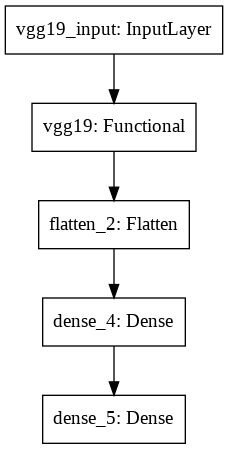

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=2e-5),
              metrics=['acc'])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5", save_best_only=True)

In [ ]:
#steps_per_epoch=len(train_generator)//20

#steps_per_epoch

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=40,
      callbacks=[checkpoint_cb])

Epoch 1/10
25/25 [==============================] - 38s 1s/step - loss: 0.4338 - acc: 0.7920 - val_loss: 0.0473 - val_acc: 0.9862
Epoch 2/10
25/25 [==============================] - 30s 1s/step - loss: 0.0928 - acc: 0.9720 - val_loss: 0.0567 - val_acc: 0.9775
Epoch 3/10
25/25 [==============================] - 35s 1s/step - loss: 0.0562 - acc: 0.9820 - val_loss: 0.0129 - val_acc: 0.9975
Epoch 4/10
25/25 [==============================] - 32s 1s/step - loss: 0.0220 - acc: 0.9960 - val_loss: 0.0178 - val_acc: 0.9912
Epoch 5/10
25/25 [==============================] - 27s 1s/step - loss: 0.0691 - acc: 0.9720 - val_loss: 0.0075 - val_acc: 0.9987
Epoch 6/10
25/25 [==============================] - 29s 1s/step - loss: 0.0422 - acc: 0.9860 - val_loss: 0.0197 - val_acc: 0.9925
Epoch 7/10
25/25 [==============================] - 29s 1s/step - loss: 0.0290 - acc: 0.9900 - val_loss: 0.0073 - val_acc: 0.9975
Epoch 8/10
25/25 [==============================] - 26s 1s/step - loss: 0.0380 - acc: 0.98

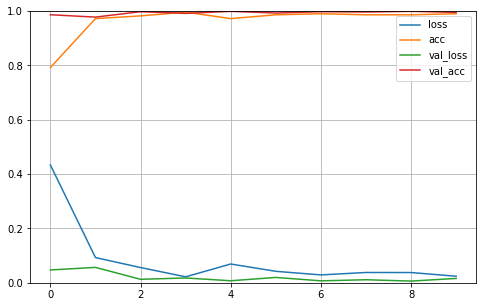

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 992 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator, steps=50)

50/50 [==============================] - 8s 150ms/step - loss: 0.0167 - acc: 0.9940


[0.016679050400853157, 0.9939516186714172]

In [68]:
model.save("facemask_v2.h5")